# OpenCV .copy() Performance Benchmark

Benchmarking `.copy()` performance for BGR uint8 images across different sizes.

In [18]:
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

print(f"OpenCV version: {cv2.__version__}")

OpenCV version: 4.12.0


In [31]:
# Configuration
IMAGE_SIZES = {
    "640x480": (480, 640),
    "1280x720": (720, 1280),
    "1920x1080": (1080, 1920),
    "3840x2160": (2160, 3840),
}

ITERATIONS = 1000

In [32]:
# Benchmark
results = {}

for size_name, (h, w) in IMAGE_SIZES.items():
    img = np.random.randint(0, 256, (h, w, 3), dtype=np.uint8)
    
    # Warmup
    for _ in range(5):
        _ = img.copy()
    
    # Benchmark
    times = []
    for _ in range(ITERATIONS):
        start = time.perf_counter()
        _ = img.copy()
        times.append(time.perf_counter() - start)
    
    mean_ms = np.mean(times) * 1000
    std_ms = np.std(times) * 1000
    results[size_name] = {"mean": mean_ms, "std": std_ms}
    
    mb = img.nbytes / (1024 * 1024)
    print(f"{size_name}: {mean_ms:.3f} ± {std_ms:.3f} ms ({mb:.1f} MB)")

640x480: 0.054 ± 0.007 ms (0.9 MB)
1280x720: 0.210 ± 0.038 ms (2.6 MB)
1920x1080: 0.480 ± 0.025 ms (5.9 MB)
3840x2160: 1.989 ± 0.083 ms (23.7 MB)


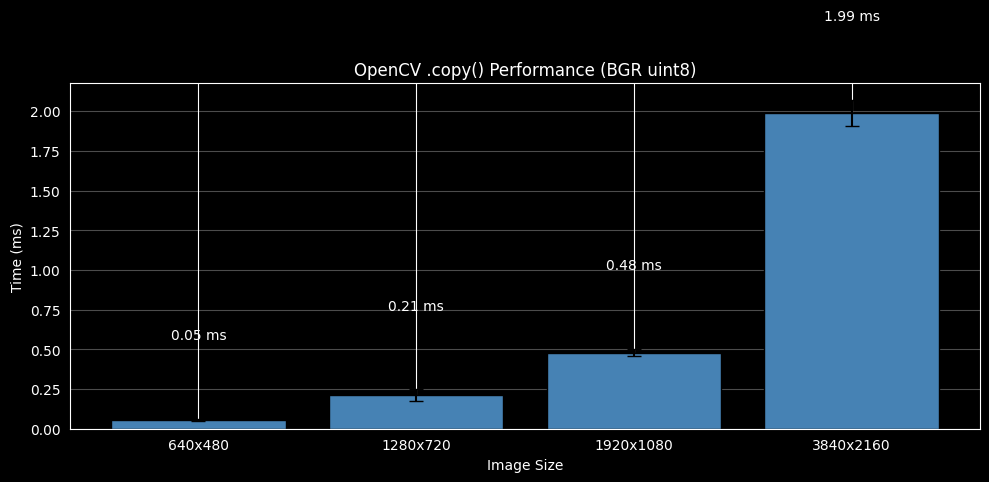

In [33]:
# Plot results
sizes = list(results.keys())
means = [results[s]["mean"] for s in sizes]
stds = [results[s]["std"] for s in sizes]

plt.figure(figsize=(10, 5))
plt.bar(sizes, means, yerr=stds, capsize=5, color='steelblue', edgecolor='black')
plt.xlabel("Image Size")
plt.ylabel("Time (ms)")
plt.title("OpenCV .copy() Performance (BGR uint8)")
plt.grid(axis='y', alpha=0.3)

for i, (m, s) in enumerate(zip(means, stds)):
    plt.text(i, m + s + 0.5, f"{m:.2f} ms", ha='center', fontsize=10)

plt.tight_layout()
plt.show()